## **Predicting Housing Prices for regions in the USA.**

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# loading csv data USA_Housing.csv to dataframe 

USA_Housing = pd.read_csv("Files/USA_Housing.csv")

# checking out the head of the Data
USA_Housing.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [3]:
#checking columns and total records (info)
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


 **Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN value.
**

In [4]:
#checking description
USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## **Exploratory Data Analysis**


**Visualizing the Entire Data using pairplot**

Exploring types of relationship across the entire dataset

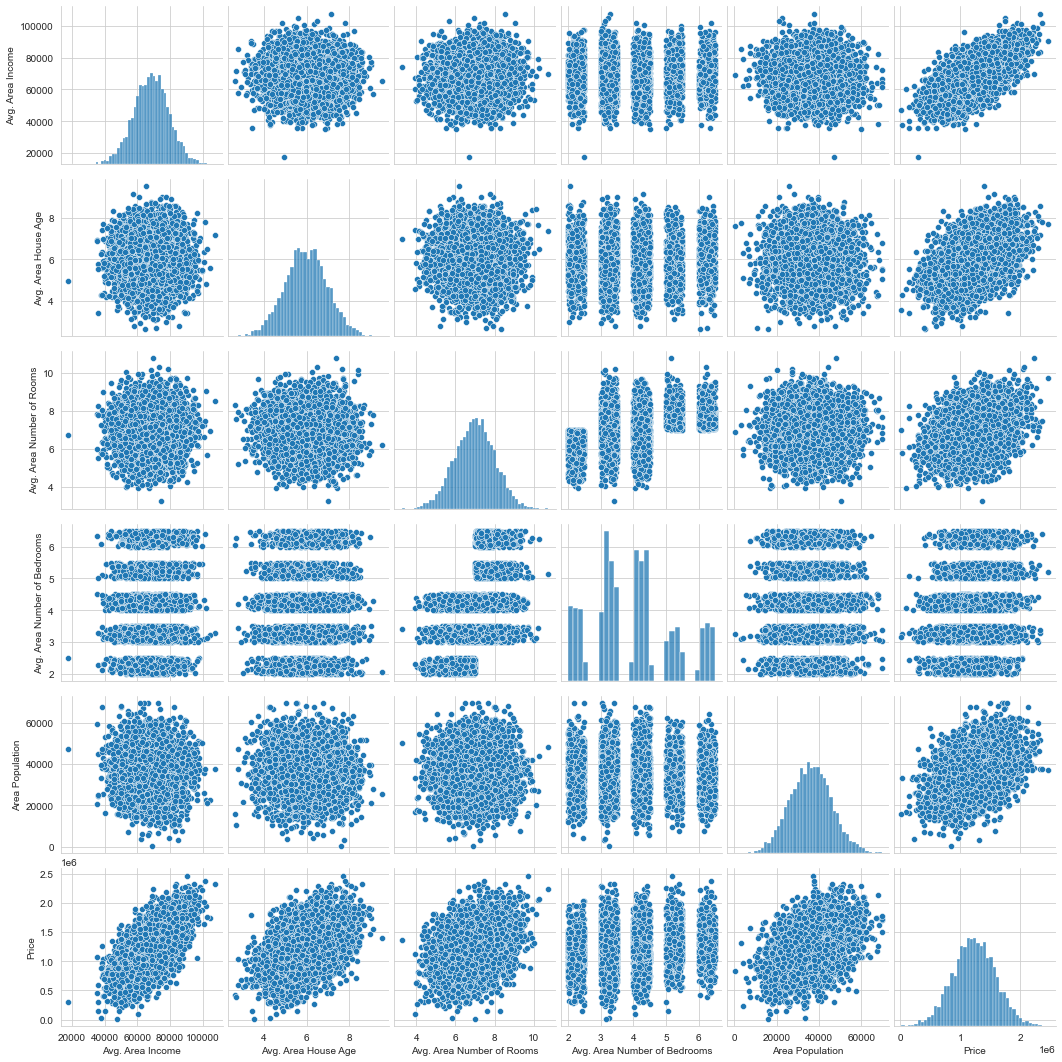

In [5]:
# pairplot of USA_Housing
sns.pairplot(USA_Housing)

## **Distribution of Housing Price Across USA**

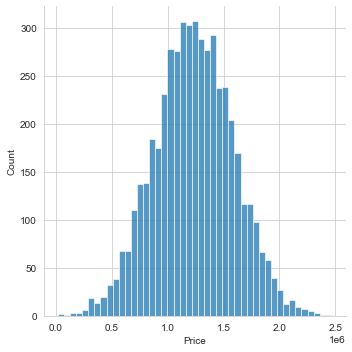

In [6]:
#histograma de USA_Housing['Price']
sns.displot(USA_Housing['Price'])

In [7]:
#Displaying correlation among all the columns 
USA_Housing.corr() # [-1, 1]  relación lineal  0  1  -1


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


## **Displaying correlation among all the columns using Heat Map**


<AxesSubplot:>

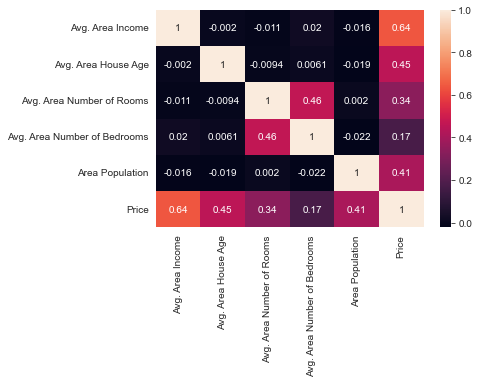

In [8]:
sns.heatmap(USA_Housing.corr(), annot=True)

## **Training a Linear Regression Model**

[](http://)We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [9]:
#Getting all Coulmn names
USA_Housing.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

y = a + b1*X + b2*X

In [12]:
# Columns as Features
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]



In [10]:
# Price is my Target Variable, what we trying to predict
y = USA_Housing['Price']

In [13]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [14]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## **Training the Model**

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
print("Total features shape:", X.shape)
print("Total train features shape:", X_train.shape)
print("Total test features shape:", X_test.shape)
print("Total train target shape:", y_train.shape)
print("Total test target shape:", y_test.shape)


Total features shape: (5000, 5)
Total train features shape: (3500, 5)
Total test features shape: (1500, 5)
Total train target shape: (3500,)
Total test target shape: (1500,)


In [17]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [18]:
#creating LinearRegression Object
lr = LinearRegression()


In [19]:
#Training the Data Model
lr.fit(X_train, y_train)

LinearRegression()

 ## **Model Evaluation**


Let's evaluate the model by checking out its coefficients 

y = a + bX + ...

In [20]:
#Displaying the Intercept
lr.intercept_

-2638673.4261905816

In [21]:
# coeficientes
lr.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.61**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$165221.11**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$121405.37**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$1318.71**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.22**.


In [22]:
# coeficientes pasados a un df
pd.DataFrame(lr.coef_,
             X.columns,
             columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


## **Predictions from our Model**

Let's grab predictions off our test set and see how well it did!

In [23]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
3563,74208.124644,6.259782,8.666717,3.38,25507.336340
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
1837,63665.394418,6.729105,7.732959,3.43,44029.681816
2380,56073.892443,6.576733,6.959056,4.40,64149.680213


In [25]:
#predictions 
predictions = lr.predict(X_test)
predictions

array([1308536.13592605, 1237122.72746462, 1243835.62817079, ...,
       1457119.79297226, 1483428.95309313, 1047510.59737201])

<AxesSubplot:ylabel='Price'>

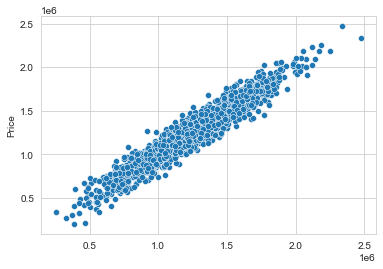

In [26]:
#scatterplot de predicciones y reales
sns.scatterplot(x=predictions, y=y_test)

In [27]:
X_test.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [28]:

new_homes = np.array([[100000.0, 20.0, 8.0, 4.0, 100000.0],
                     [200000.0, 40.0, 16.0, 8.0, 110000.0]])
new_homes


array([[1.0e+05, 2.0e+01, 8.0e+00, 4.0e+00, 1.0e+05],
       [2.0e+05, 4.0e+01, 1.6e+01, 8.0e+00, 1.1e+05]])

In [29]:
# predicción de nuevas casas
lr.predict(new_homes)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 5325439.11060517, 11920059.32181759])

In [30]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1840,55245.337288,3.965745,8.961106,4.38,43557.943435
2115,62305.638407,6.490769,7.647362,3.19,47066.617420
4437,77345.472379,5.407515,8.243178,3.11,26706.911029
1146,65846.171039,6.385374,6.804131,3.18,28214.363551
2486,69350.793357,6.910415,8.288048,4.29,36779.058567
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


## **Residual Histogram**

**Ploting a histogram of the residuals and making sure it looks normally distributed.**

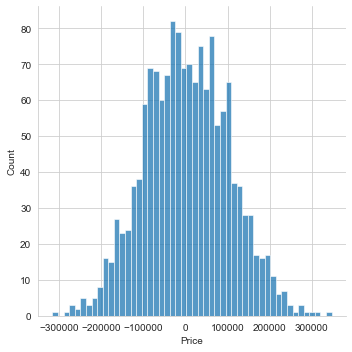

In [31]:
# histograma de residuos
sns.displot((y_test - predictions), bins = 50)

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [32]:
# librería de métricas
from sklearn import metrics

In [33]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81135.56609336879
MSE: 10068422551.400925
RMSE: 100341.52954485458


In [34]:
# score de regresión lineal
lr.score(X_train, y_train)

0.9192986579075526

In [35]:
# score de test
lr.score(X_test, y_test)

0.9146818498754012

In [36]:
# descripción de precios
USA_Housing['Price'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

In [37]:
# statsmodel API
import pandas.testing as tm
import statsmodels.api as sm

X2 = sm.add_constant(X_train) # añade una columna de unos a X_train
# no se añade el intercept por defecto, lo añadimos nosotros
est = sm.OLS(y_train, X2) # ordinary least squares = mínimos cuadrados = error cuadrático medio RMSE root mean sq err
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     7960.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:09:25   Log-Likelihood:                -45311.
No. Observations:                3500   AIC:                         9.063e+04
Df Residuals:                    3494   BIC:                         9.067e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
MAE: 81135.56609336879
MSE: 10068422551.400928
RMSE: 100341.5295448546

In [44]:
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y = USA_Housing['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 81116.43361053693
MSE: 10062092569.29856
RMSE: 100309.982401048
